# Sales Analysis

#### Import necessary libraries

In [2]:
import os
import pandas as pd
import gspread
import matplotlib.pyplot as plt

#### Merge data from each month into one CSV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Akash'


In [6]:
import os
import pandas as pd

# Specify the directory containing CSV files
directory = "/content/drive/MyDrive/Akash"

# Get a list of all files in the directory
files = os.listdir(directory)

# Initialize an empty DataFrame to hold all the data
all_months_data = pd.DataFrame()

# Iterate over each file in the directory
for file in files:
    # Check if the file is a CSV file
    if file.endswith(".csv"):
        # Read the CSV file
        df = pd.read_csv(os.path.join(directory, file))
        # Concatenate the data to the DataFrame
        all_months_data = pd.concat([all_months_data, df])

# Now you can work with the concatenated DataFrame 'all_months_data'


In [7]:
pip install gspread pandas oauth2client


Covert to Microsaft Execl to Gsheet

In [8]:
import gspread
from google.oauth2.service_account import Credentials

# Load credentials from JSON key file
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file('/content/drive/MyDrive/Akash2/angle-health-care-f46ce736e231.json', scopes=scope)

# Authorize the client using the credentials
client = gspread.authorize(creds)

# List of spreadsheet titles
spreadsheet_titles = ['Sales_January_2019', 'Sales_February_2019', 'Sales_March_2019', 'Sales_April_2019',
                      'Sales_May_2019', 'Sales_June_2019', 'Sales_July_2019', 'Sales_August_2019',
                      'Sales_September_2019', 'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']

# Loop through each spreadsheet title
for title in spreadsheet_titles:
    # Open the Google Sheet by its title
    sheet = client.open(title)

    # Select the worksheet
    worksheet = sheet.sheet1  # Adjust this according to your sheet index or title

    # Now you can perform operations on the worksheet
    # For example, you can get the values from the sheet
    values = worksheet.get_all_values()

    # Or you can update the values in the sheet
    # worksheet.update('A1', 'New value')

    # Or any other actions you need to perform

    # End of actions for this spreadsheet

# End of loop for all spreadsheets


In [9]:
pip install pandas gspread oauth2client


Concatenate all DataFrames together

In [10]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Step 2: Authenticate with Google Sheets API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/MyDrive/Akash2/angle-health-care-f46ce736e231.json', scope)
gc = gspread.authorize(credentials)

# Step 3: Read .gsheet files into pandas DataFrames
sheet_ids = ['1cXpC1JsJ_nqGRNg3eXjM7KLdTyHccwJCJI7qvCQoyDQ',
                               '1oHqIuIpLeLqBtQGILIXy93_Ni1Aa4NRZDIMwRZiI6tY',
                               '1WKwNUl1Z5Ae6XJhSHwee4UXyYwAgVrRdqHPuSscjEdI',
                               '1bbE3O3L-JNCndfiAebzn8ZRoC3DYSxymbcdfog2sWqY',
                               '1_OVhHVdhiU48r-2ra0pAA3YHTI7-V6yr_UMmR4luOF4',
                               '19EMw3TtDafdv1JjO6gEToQzL3ROlmOVAqQUbfaKW3Lk',
                               '11lYIsJs92j-nBlGs2tITIs8zGSfuF_rmLnqctVl1QlM',
                               '1LFwylrM0VywCKw5SGZyTiSYqZPTBJLYHpoh-10ofKD4',
                               '1cs2FtxN4XPcTpyRWsKtzQrlGHJpK1RfRevAr7_qWEJA',
                               '13CpBybt-kX_vR0jo2dRvDULyme-W2tSOaMoCgHHkl1A',
                               '1RElS3visGhyfMXl06EdqEp2RmqxyhDMWHNStIwLQ6yw',
                               '1PEX1EeQHoeMIO1Waml3fimsYILFeePeHQFfrZEtPsLY']  # Spreadsheet IDs
sheet_names = ['Sales_January_2019', 'Sales_February_2019', 'Sales_March_2019', 'Sales_April_2019',
                      'Sales_May_2019', 'Sales_June_2019', 'Sales_July_2019', 'Sales_August_2019',
                      'Sales_September_2019', 'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']  # Adjust sheet names accordingly
dfs = []

for sheet_id, sheet_name in zip(sheet_ids, sheet_names):
    workbook = gc.open_by_key(sheet_id)
    worksheet = workbook.get_worksheet(0)  # Assuming you want the first worksheet
    records = worksheet.get_all_records()
    df = pd.DataFrame(records)
    dfs.append(df)

# Step 4: Concatenate all DataFrames together
concatenated_df = pd.concat(dfs, ignore_index=True)

# Now you have concatenated DataFrame containing all data from your .gsheet files
print(concatenated_df)


       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

**Create New Cell**

In [11]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Step 1: Authenticate with Google Sheets API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/MyDrive/Akash2/angle-health-care-f46ce736e231.json', scope)
gc = gspread.authorize(credentials)

# Step 2: Read .gsheet files into pandas DataFrames
sheet_ids = ['1cXpC1JsJ_nqGRNg3eXjM7KLdTyHccwJCJI7qvCQoyDQ',
             '1oHqIuIpLeLqBtQGILIXy93_Ni1Aa4NRZDIMwRZiI6tY',
             '1WKwNUl1Z5Ae6XJhSHwee4UXyYwAgVrRdqHPuSscjEdI',
             '1bbE3O3L-JNCndfiAebzn8ZRoC3DYSxymbcdfog2sWqY',
             '1_OVhHVdhiU48r-2ra0pAA3YHTI7-V6yr_UMmR4luOF4',
             '19EMw3TtDafdv1JjO6gEToQzL3ROlmOVAqQUbfaKW3Lk',
             '11lYIsJs92j-nBlGs2tITIs8zGSfuF_rmLnqctVl1QlM',
             '1LFwylrM0VywCKw5SGZyTiSYqZPTBJLYHpoh-10ofKD4',
             '1cs2FtxN4XPcTpyRWsKtzQrlGHJpK1RfRevAr7_qWEJA',
             '13CpBybt-kX_vR0jo2dRvDULyme-W2tSOaMoCgHHkl1A',
             '1RElS3visGhyfMXl06EdqEp2RmqxyhDMWHNStIwLQ6yw',
             '1PEX1EeQHoeMIO1Waml3fimsYILFeePeHQFfrZEtPsLY']  # Replace with your actual Spreadsheet IDs
sheet_names = ['Sales_January_2019', 'Sales_February_2019', 'Sales_March_2019', 'Sales_April_2019',
               'Sales_May_2019', 'Sales_June_2019', 'Sales_July_2019', 'Sales_August_2019',
               'Sales_September_2019', 'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']  # Adjust sheet names accordingly
dfs = []

for sheet_id, sheet_name in zip(sheet_ids, sheet_names):
    workbook = gc.open_by_key(sheet_id)
    worksheet = workbook.worksheet(sheet_name)
    records = worksheet.get_all_records()
    df = pd.DataFrame(records)
    # Set column names explicitly
    df.columns = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
    dfs.append(df)

# Step 3: Concatenate all DataFrames together
concatenated_df = pd.concat(dfs, ignore_index=True)

# Step 4: Save concatenated DataFrame to a new .gsheet file in Google Drive
# First, convert DataFrame to a list of lists for gspread
data = concatenated_df.values.tolist()

# Create a new Google Sheets file
new_workbook = gc.create('Akash Analysis')

# Select the first worksheet (index 0)
worksheet = new_workbook.get_worksheet(0)

# Update the worksheet with the concatenated data
worksheet.update('A1', data)

print("Concatenated DataFrame saved to a new .gsheet file in Google Drive")


Concatenated DataFrame saved to a new .gsheet file in Google Drive


In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# **1:Add Column**

In [13]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Step 1: Authenticate with Google Sheets API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/MyDrive/Akash2/angle-health-care-f46ce736e231.json', scope)
gc = gspread.authorize(credentials)

# Step 2: Read .gsheet files into pandas DataFrames
sheet_ids = ['1cXpC1JsJ_nqGRNg3eXjM7KLdTyHccwJCJI7qvCQoyDQ',
             '1oHqIuIpLeLqBtQGILIXy93_Ni1Aa4NRZDIMwRZiI6tY',
             '1WKwNUl1Z5Ae6XJhSHwee4UXyYwAgVrRdqHPuSscjEdI',
             '1bbE3O3L-JNCndfiAebzn8ZRoC3DYSxymbcdfog2sWqY',
             '1_OVhHVdhiU48r-2ra0pAA3YHTI7-V6yr_UMmR4luOF4',
             '19EMw3TtDafdv1JjO6gEToQzL3ROlmOVAqQUbfaKW3Lk',
             '11lYIsJs92j-nBlGs2tITIs8zGSfuF_rmLnqctVl1QlM',
             '1LFwylrM0VywCKw5SGZyTiSYqZPTBJLYHpoh-10ofKD4',
             '1cs2FtxN4XPcTpyRWsKtzQrlGHJpK1RfRevAr7_qWEJA',
             '13CpBybt-kX_vR0jo2dRvDULyme-W2tSOaMoCgHHkl1A',
             '1RElS3visGhyfMXl06EdqEp2RmqxyhDMWHNStIwLQ6yw',
             '1PEX1EeQHoeMIO1Waml3fimsYILFeePeHQFfrZEtPsLY']  # Replace with your actual Spreadsheet IDs
sheet_names = ['Sales_January_2019', 'Sales_February_2019', 'Sales_March_2019', 'Sales_April_2019',
               'Sales_May_2019', 'Sales_June_2019', 'Sales_July_2019', 'Sales_August_2019',
               'Sales_September_2019', 'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']  # Adjust sheet names accordingly
dfs = []

for sheet_id, sheet_name in zip(sheet_ids, sheet_names):
    workbook = gc.open_by_key(sheet_id)
    worksheet = workbook.worksheet(sheet_name)
    records = worksheet.get_all_records()
    df = pd.DataFrame(records)
    # Set column names explicitly
    df.columns = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
    dfs.append(df)

# Step 3: Concatenate all DataFrames together
concatenated_df = pd.concat(dfs, ignore_index=True)

# Step 4: Convert 'Quantity Ordered' and 'Price Each' columns to numeric, replacing non-numeric values with NaN
concatenated_df['Quantity Ordered'] = pd.to_numeric(concatenated_df['Quantity Ordered'], errors='coerce')
concatenated_df['Price Each'] = pd.to_numeric(concatenated_df['Price Each'], errors='coerce')

# Step 5: Fill NaN values with 0
concatenated_df.fillna(0, inplace=True)

# Step 6: Calculate Total Sales
concatenated_df['Total Sales'] = concatenated_df['Quantity Ordered'] * concatenated_df['Price Each']

# Additional Step: Filter out non-date values in 'Order Date'
concatenated_df = concatenated_df[concatenated_df['Order Date'].str.match(r'\d{2}/\d{2}/\d{2} \d{2}:\d{2}')]

# Additional Step: Extract Year from 'Order Date'
concatenated_df['Year'] = pd.to_datetime(concatenated_df['Order Date'], format='%m/%d/%y %H:%M').dt.year

# Additional Step: Extract City from 'Purchase Address'
concatenated_df['City'] = concatenated_df['Purchase Address'].apply(lambda x: x.split(',')[1])

# Step 7: Update the existing worksheet with the new columns
# Select the existing worksheet ('Akash Analysis')
existing_workbook = gc.open('Akash Analysis')
existing_worksheet = existing_workbook.get_worksheet(0)  # Assuming it's the first worksheet

# Convert the DataFrame to a list of lists for gspread
updated_data = [concatenated_df.columns.values.tolist()] + concatenated_df.values.tolist()

# Update the worksheet with the updated data
existing_worksheet.update([concatenated_df.columns.values.tolist()] + updated_data)

print("Concatenated DataFrame with Total Sales, Year, and City columns saved to the existing worksheet in Google Drive")


Concatenated DataFrame with Total Sales, Year, and City columns saved to the existing worksheet in Google Drive


#  **Read in updated dataframe**

In [14]:
# Print the updated DataFrame
print(concatenated_df)


       Order ID                     Product  Quantity Ordered  Price Each  \
0        141234                      iPhone               1.0      700.00   
1        141235    Lightning Charging Cable               1.0       14.95   
2        141236            Wired Headphones               2.0       11.99   
3        141237            27in FHD Monitor               1.0      149.99   
4        141238            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186845   319666    Lightning Charging Cable               1.0       14.95   
186846   319667       AA Batteries (4-pack)               2.0        3.84   
186847   319668             Vareebadd Phone               1.0      400.00   
186848   319669            Wired Headphones               1.0       11.99   
186849   319670  Bose SoundSport Headphones               1.0       99.99   

            Order Date                        Purchase Address  Total Sales

In [15]:
# Display the first few rows of the DataFrame
print(concatenated_df.head(10))

  Order ID                     Product  Quantity Ordered  Price Each  \
0   141234                      iPhone               1.0      700.00   
1   141235    Lightning Charging Cable               1.0       14.95   
2   141236            Wired Headphones               2.0       11.99   
3   141237            27in FHD Monitor               1.0      149.99   
4   141238            Wired Headphones               1.0       11.99   
5   141239      AAA Batteries (4-pack)               1.0        2.99   
6   141240      27in 4K Gaming Monitor               1.0      389.99   
7   141241        USB-C Charging Cable               1.0       11.95   
8   141242  Bose SoundSport Headphones               1.0       99.99   
9   141243    Apple Airpods Headphones               1.0      150.00   

       Order Date                         Purchase Address  Total Sales  Year  \
0  01/22/19 21:25          944 Walnut St, Boston, MA 02215       700.00  2019   
1  01/28/19 14:15         185 Maple St, Portl

In [16]:
# Check for missing values
print(concatenated_df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Total Sales         0
Year                0
City                0
dtype: int64


In [17]:
# Unique values in a column
print(concatenated_df['Order ID'].unique())

[141234 141235 141236 ... 319668 319669 319670]


# **2.Exploratory Data Analysis (EDA):**

In [18]:
# Summary statistics
print(concatenated_df.describe())

       Quantity Ordered     Price Each    Total Sales           Year
count     185950.000000  185950.000000  185950.000000  185950.000000
mean           1.124383     184.399735     185.490917    2019.000183
std            0.442793     332.731330     332.919771       0.013521
min            1.000000       2.990000       2.990000    2019.000000
25%            1.000000      11.950000      11.950000    2019.000000
50%            1.000000      14.950000      14.950000    2019.000000
75%            1.000000     150.000000     150.000000    2019.000000
max            9.000000    1700.000000    3400.000000    2020.000000


In [19]:
# Check for missing values
print(concatenated_df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Total Sales         0
Year                0
City                0
dtype: int64


In [20]:
# Check unique values in categorical columns
print(concatenated_df['Product'].unique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']


In [21]:
# Value counts of categorical variables
print(concatenated_df['Product'].value_counts())

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64


In [22]:
import pandas as pd

# Define a function to convert non-numeric values to numeric
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None  # Return None for non-convertible values

# Apply the conversion function to each cell in the DataFrame
concatenated_df_numeric = concatenated_df.applymap(convert_to_numeric)

# Once you've converted non-numeric values to numeric or NaN, you can calculate the correlation matrix
correlation_matrix = concatenated_df_numeric.corr()
print(correlation_matrix)


                  Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Order ID          1.000000      NaN          0.000702   -0.002857         NaN   
Product                NaN      NaN               NaN         NaN         NaN   
Quantity Ordered  0.000702      NaN          1.000000   -0.148272         NaN   
Price Each       -0.002857      NaN         -0.148272    1.000000         NaN   
Order Date             NaN      NaN               NaN         NaN         NaN   
Purchase Address       NaN      NaN               NaN         NaN         NaN   
Total Sales      -0.002949      NaN         -0.139417    0.999203         NaN   
Year              0.020130      NaN          0.002489    0.002670         NaN   
City                   NaN      NaN               NaN         NaN         NaN   

                  Purchase Address  Total Sales      Year  City  
Order ID                       NaN    -0.002949  0.020130   NaN  
Product                        NaN          NaN       NaN

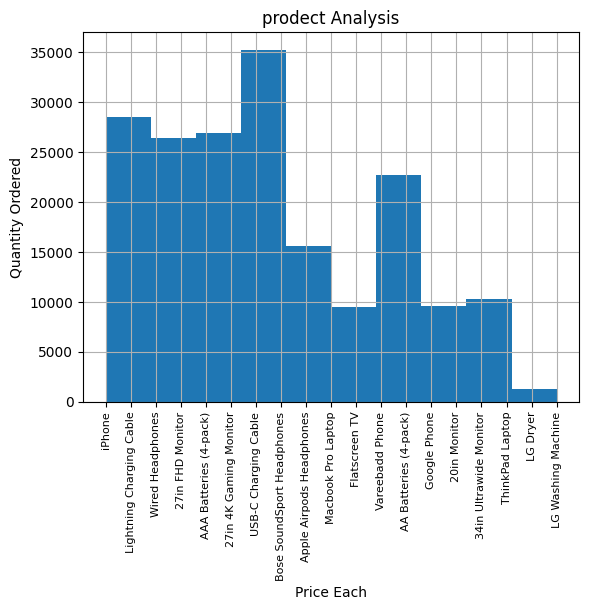

In [23]:
# Distribution of a numerical variable
import matplotlib.pyplot as plt
concatenated_df['Product'].hist()
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.title('prodect Analysis')
plt.xticks( rotation='vertical', size=8)
plt.show()

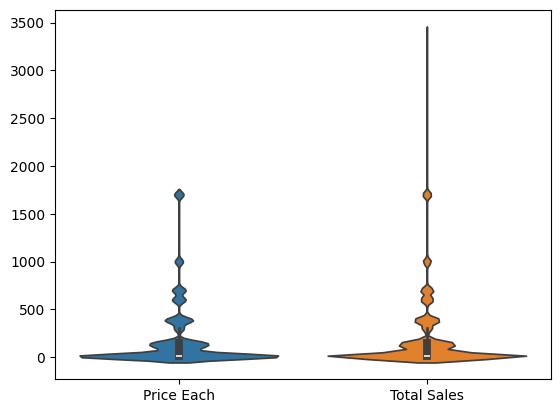

In [24]:
# Relationships between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming concatenated_df is your DataFrame
# Specify variables for pairplot
vars_to_plot = ['Price Each', 'Total Sales','Product']  # Replace with actual variable names

# Create pairplot
sns.violinplot(concatenated_df[vars_to_plot])

# Show the plot
plt.show()

# **3. Data Visualization:**


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

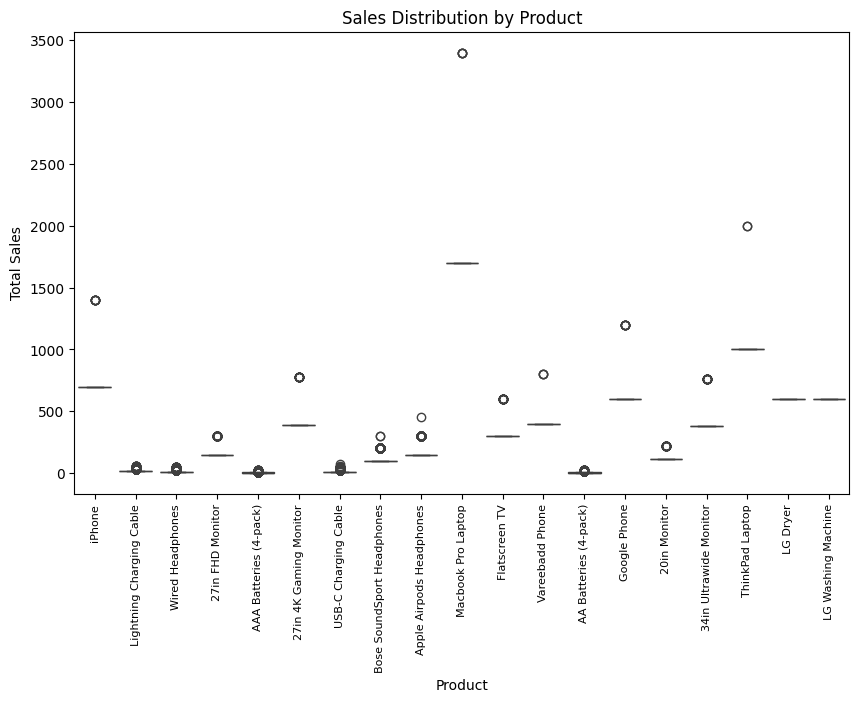

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'concatenated_df' contains your data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Total Sales', data=concatenated_df)
plt.title('Sales Distribution by Product')
plt.xticks(rotation='vertical', size=8)
plt.show()


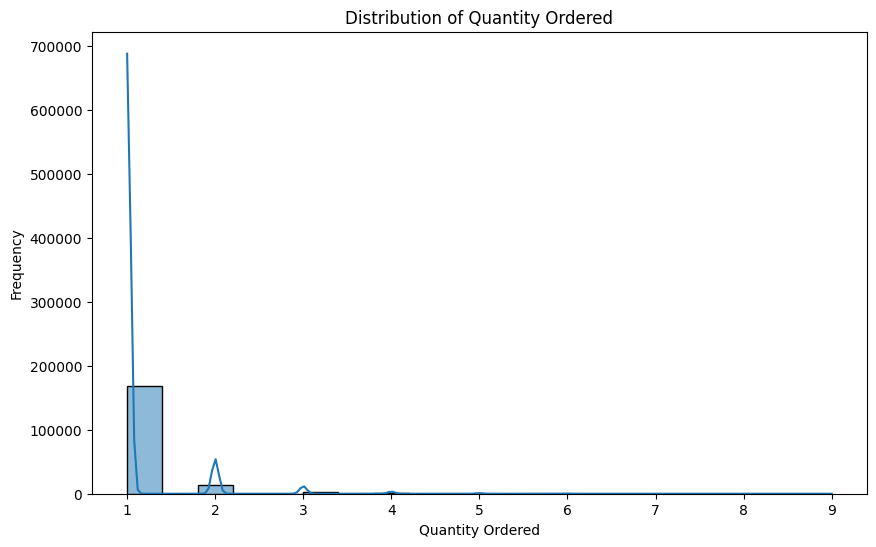

In [27]:
# Distribution of 'Quantity Ordered'
plt.figure(figsize=(10, 6))
sns.histplot(concatenated_df['Quantity Ordered'], bins=20, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()


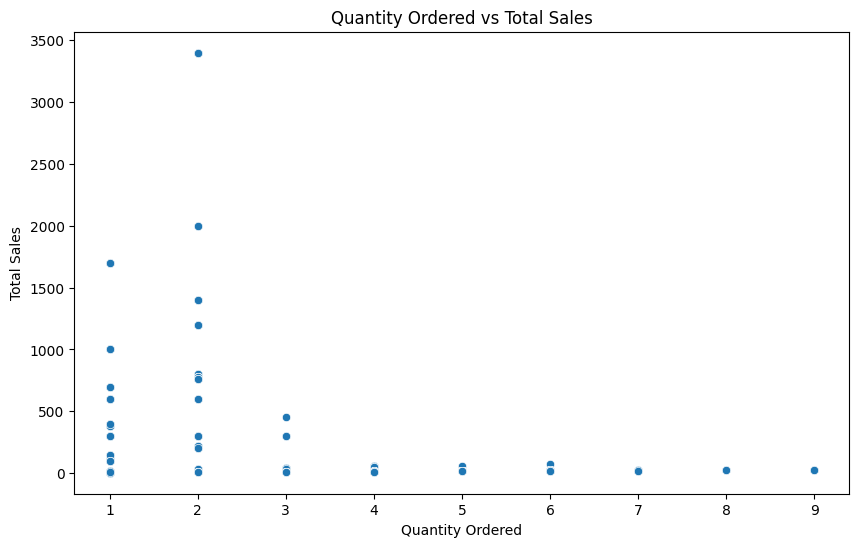

In [28]:
# Assuming 'concatenated_df' contains your data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=concatenated_df, x='Quantity Ordered', y='Total Sales')
plt.title('Quantity Ordered vs Total Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Sales')
plt.show()


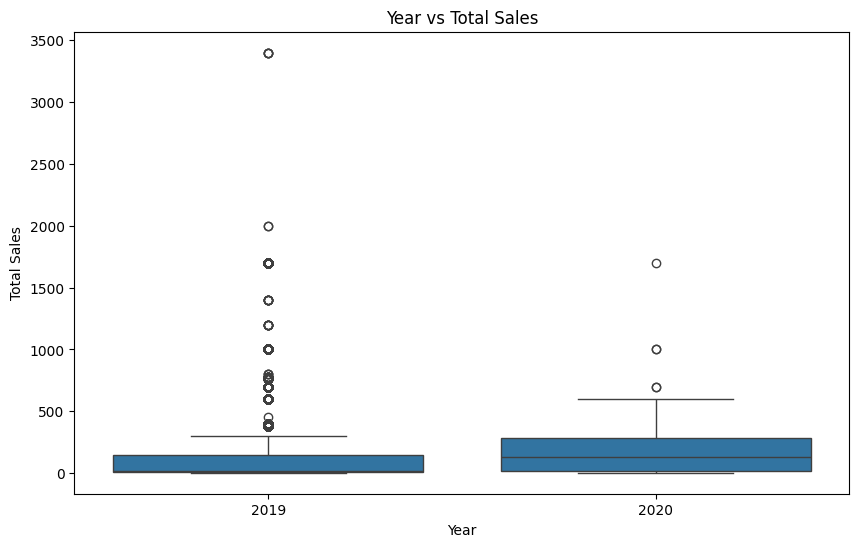

In [29]:
# Box plot of 'Year' vs 'Total Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(data=concatenated_df, x='Year', y='Total Sales')
plt.title('Year vs Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

# **4.Statistical Analysis**:



In [30]:
# Average sales by product
avg_sales_by_product = concatenated_df.groupby('Product')['Total Sales'].mean().sort_values(ascending=False)
print("Average Sales by Product:")
print(avg_sales_by_product)


Average Sales by Product:
Product
Macbook Pro Laptop            1701.439458
ThinkPad Laptop               1000.474491
iPhone                         700.716165
Google Phone                   600.760181
LG Dryer                       600.000000
LG Washing Machine             600.000000
Vareebadd Phone                400.581114
27in 4K Gaming Monitor         390.866382
34in Ultrawide Monitor         381.096588
Flatscreen TV                  301.187500
Apple Airpods Headphones       151.080455
27in FHD Monitor               150.849141
20in Monitor                   110.740968
Bose SoundSport Headphones     100.980520
Lightning Charging Cable        16.026140
USB-C Charging Cable            13.080457
Wired Headphones                13.053619
AA Batteries (4-pack)            5.157137
AAA Batteries (4-pack)           4.493040
Name: Total Sales, dtype: float64


In [31]:
# Mean Total Sales by Year
mean_sales_by_year = concatenated_df.groupby('Year')['Total Sales'].mean()

# Total Sales by City
total_sales_by_city = concatenated_df.groupby('City')['Total Sales'].sum()


#  **5:Machine Learning Models (for prediction or classification tasks):**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for model training
X = concatenated_df[['Quantity Ordered', 'Price Each']]
y = concatenated_df['Total Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 216.21652785637724
R-squared: 0.9980528578830877
